In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/processed/players_clean.csv')

print(f"Dataset: {df.shape[0]:,} joueurs, {df.shape[1]} colonnes")

Dataset: 19,239 joueurs, 18 colonnes


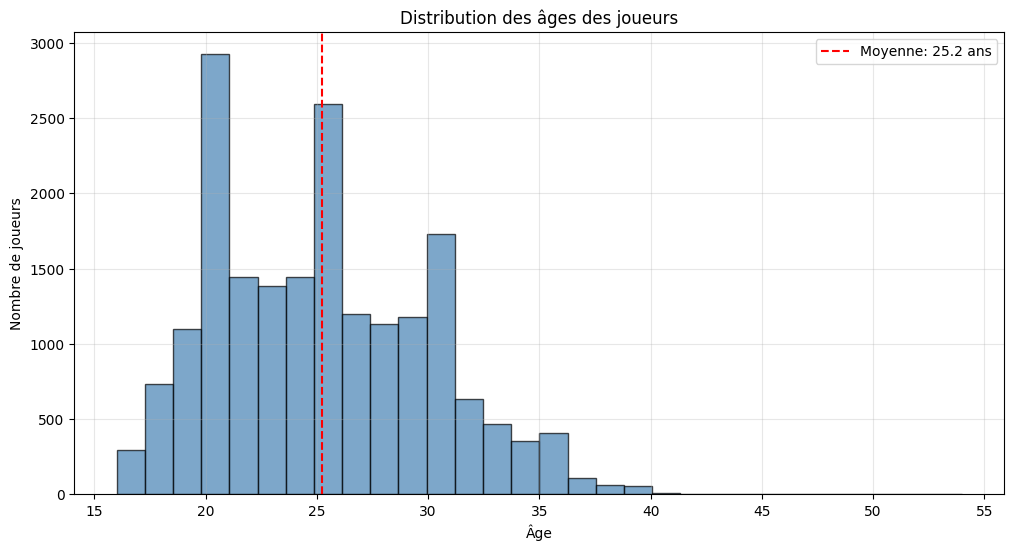

Âge moyen: 25.2 ans
Âge médian: 25.0 ans


In [2]:
plt.figure(figsize=(12, 6))
plt.hist(df['age'], bins=30, color='steelblue', edgecolor='black', alpha=0.7)
plt.xlabel('Âge')
plt.ylabel('Nombre de joueurs')
plt.title('Distribution des âges des joueurs')
plt.axvline(df['age'].mean(), color='red', linestyle='--', label=f'Moyenne: {df["age"].mean():.1f} ans')
plt.legend()
plt.grid(alpha=0.3)
plt.savefig('../visualizations/age_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print(f"Âge moyen: {df['age'].mean():.1f} ans")
print(f"Âge médian: {df['age'].median():.1f} ans")

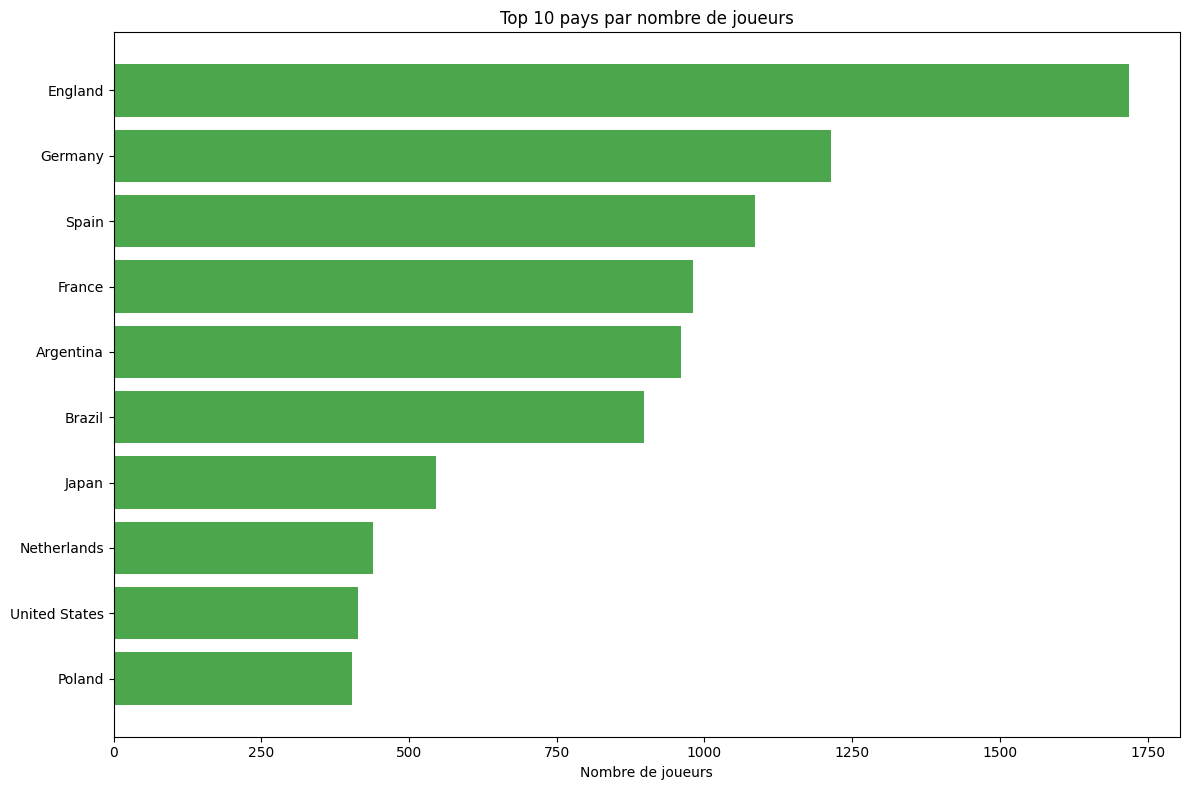

In [5]:
top_countries = df['nationality_name'].value_counts().head(10)

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_countries)), top_countries.values, color='green', alpha=0.7)
plt.yticks(range(len(top_countries)), top_countries.index)
plt.xlabel('Nombre de joueurs')
plt.title('Top 10 pays par nombre de joueurs')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../visualizations/top_countries.png', dpi=300, bbox_inches='tight')
plt.show()

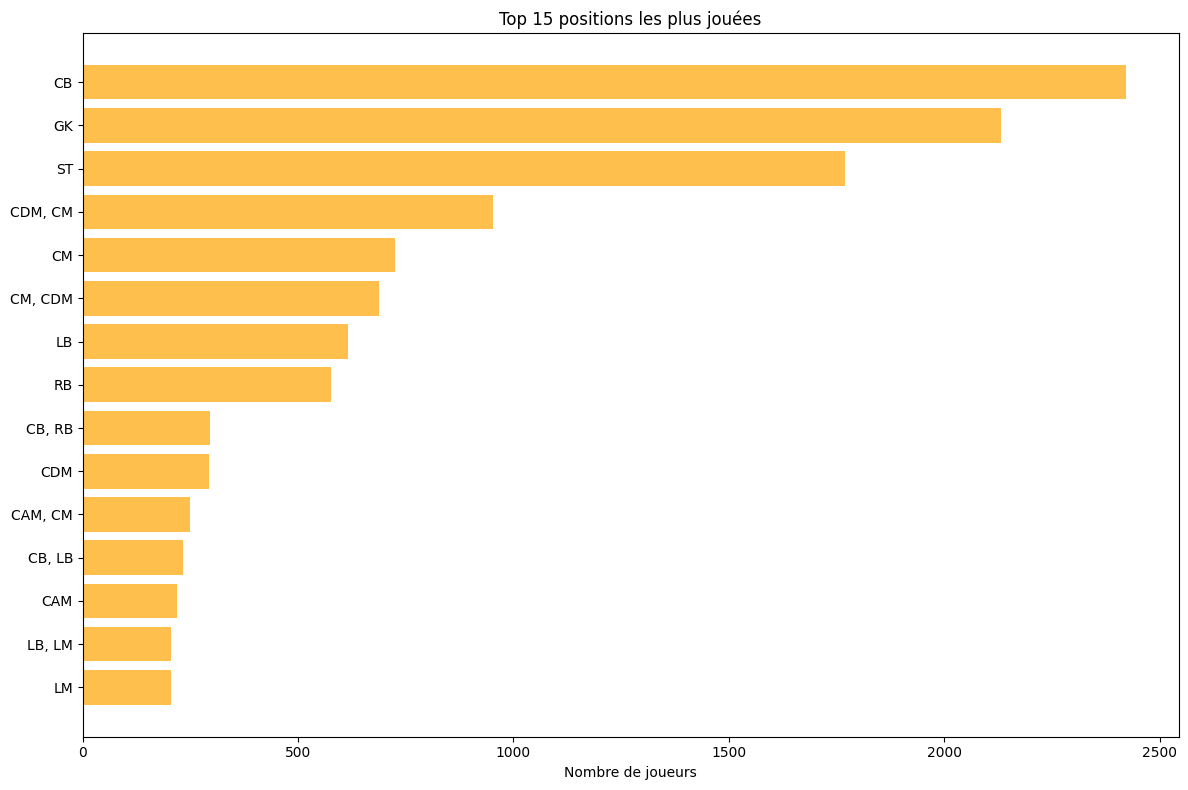

In [6]:
top_positions = df['player_positions'].value_counts().head(15)

plt.figure(figsize=(12, 8))
plt.barh(range(len(top_positions)), top_positions.values, color='orange', alpha=0.7)
plt.yticks(range(len(top_positions)), top_positions.index)
plt.xlabel('Nombre de joueurs')
plt.title('Top  positions les plus jouées')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig('../visualizations/top_positions.png', dpi=300, bbox_inches='tight')
plt.show()